In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv('/run/media/devesh/Hard Disk/Projects/Healthcare Analytics/input/train_new.csv')
test = pd.read_csv('/run/media/devesh/Hard Disk/Projects/Healthcare Analytics/input/test.csv')
HC_details = pd.read_csv('/run/media/devesh/Hard Disk/Projects/Healthcare Analytics/input/Health_Camp_Detail.csv')
pat_pro = pd.read_csv('/run/media/devesh/Hard Disk/Projects/Healthcare Analytics/input/Patient_Profile.csv')

In [3]:
pat_pro.head(3)

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI


In [4]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome
0,489652,6578,10-Sep-05,4,0,0,0,2,1
1,507246,6578,18-Aug-05,45,5,0,0,7,0
2,523729,6534,29-Apr-06,0,0,0,0,0,1
3,524931,6535,07-Feb-04,0,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7,1


In [5]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [9]:
df = pd.concat([train, test])

In [10]:
df = df.reset_index()

In [11]:
df.drop(['index'], axis = 1, inplace = True)

In [12]:
df = df.reset_index()

In [13]:
df.head()

,index,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome
0,0,489652,6578,10-Sep-05,4,0,0,0,2,1.0
1,1,507246,6578,18-Aug-05,45,5,0,0,7,0.0
2,2,523729,6534,29-Apr-06,0,0,0,0,0,1.0
3,3,524931,6535,07-Feb-04,0,0,0,0,0,0.0
4,4,521364,6529,28-Feb-06,15,1,0,0,7,1.0


In [368]:
df.tail()

,index,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome
110188,110188,507261,6525,13-Apr-06,12,2,0,0,6,NaN
110189,110189,513607,6551,03-Nov-06,0,0,0,0,0,NaN
110190,110190,498160,6584,17-Jun-06,0,0,0,0,0,NaN
110191,110191,502444,6567,13-Jan-07,0,0,0,0,0,NaN
110192,110192,523811,6584,16-Jun-06,4,3,0,2,4,NaN


In [6]:
ls = list(train.loc[train['Registration_Date'].isnull()].index)
train.drop(ls, axis = 0, inplace = True)

In [7]:
train = train.reset_index(drop = True)

In [8]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome
0,489652,6578,10-Sep-05,4,0,0,0,2,1
1,507246,6578,18-Aug-05,45,5,0,0,7,0
2,523729,6534,29-Apr-06,0,0,0,0,0,1
3,524931,6535,07-Feb-04,0,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7,1


In [14]:
df = pd.merge(df, pat_pro, on = 'Patient_ID')

In [15]:
df = pd.merge(df, HC_details, on = 'Health_Camp_ID')

In [16]:
df = df.sort_values('index')

In [17]:
df.head()

,index,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome,...,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,0,489652,6578,10-Sep-05,4,0,0,0,2,1.0,...,None,None,06-Dec-04,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
1,1,507246,6578,18-Aug-05,45,5,0,0,7,0.0,...,75,40,08-Sep-04,C,Others,16-Aug-05,14-Oct-05,Third,G,2
75317,2,523729,6534,29-Apr-06,0,0,0,0,0,1.0,...,None,None,22-Jun-04,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
81934,3,524931,6535,07-Feb-04,0,0,0,0,0,0.0,...,None,None,07-Feb-04,I,NaN,01-Feb-04,18-Feb-04,First,E,2
54710,4,521364,6529,28-Feb-06,15,1,0,0,7,1.0,...,70,40,04-Jul-03,I,Technology,30-Mar-06,03-Apr-06,Second,A,2


In [376]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome
0,489652,6578,10-Sep-05,4,0,0,0,2,1
1,507246,6578,18-Aug-05,45,5,0,0,7,0
2,523729,6534,29-Apr-06,0,0,0,0,0,1
3,524931,6535,07-Feb-04,0,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7,1


In [377]:
df.isnull().sum()

index                    0
Patient_ID               0
Health_Camp_ID           0
Registration_Date        0
Var1                     0
Var2                     0
Var3                     0
Var4                     0
Var5                     0
Outcome              35249
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income                   0
Education_Score          0
Age                      0
First_Interaction        0
City_Type            46462
Employer_Category    90766
Camp_Start_Date          0
Camp_End_Date            0
Category1                0
Category2                0
Category3                0
dtype: int64

In [18]:
df['Camp_Start_Date'] = pd.to_datetime(df['Camp_Start_Date'])
df['Camp_End_Date'] = pd.to_datetime(df['Camp_End_Date'])
df['Registration_Date'] = pd.to_datetime(df['Registration_Date'])
df['First_Interaction'] = pd.to_datetime(df['First_Interaction'])

In [19]:
df.head()

,index,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome,...,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,0,489652,6578,2005-09-10,4,0,0,0,2,1.0,...,None,None,2004-12-06,NaN,NaN,2005-08-16,2005-10-14,Third,G,2
1,1,507246,6578,2005-08-18,45,5,0,0,7,0.0,...,75,40,2004-09-08,C,Others,2005-08-16,2005-10-14,Third,G,2
75317,2,523729,6534,2006-04-29,0,0,0,0,0,1.0,...,None,None,2004-06-22,NaN,NaN,2005-10-17,2007-11-07,Second,A,2
81934,3,524931,6535,2004-02-07,0,0,0,0,0,0.0,...,None,None,2004-02-07,I,NaN,2004-02-01,2004-02-18,First,E,2
54710,4,521364,6529,2006-02-28,15,1,0,0,7,1.0,...,70,40,2003-07-04,I,Technology,2006-03-30,2006-04-03,Second,A,2


In [20]:
df['start_day'] = df['Camp_Start_Date'].dt.day
df['start_month'] = df['Camp_Start_Date'].dt.month
df['start_year'] = df['Camp_Start_Date'].dt.year
df['end_day'] = df['Camp_End_Date'].dt.day
df['end_month'] = df['Camp_End_Date'].dt.month
df['end_year'] = df['Camp_End_Date'].dt.year
df['reg_day'] = df['Registration_Date'].dt.day
df['reg_month'] = df['Registration_Date'].dt.month
df['reg_year'] = df['Registration_Date'].dt.year
df['first_day'] = df['First_Interaction'].dt.day
df['first_month'] = df['First_Interaction'].dt.month
df['first_year'] = df['First_Interaction'].dt.year

In [21]:
df['Registration_Date'][0] > df['First_Interaction'][0]

True

In [22]:
df['First_Interaction'][0]

Timestamp('2004-12-06 00:00:00')

In [23]:
df['Registration_Date'][0]

Timestamp('2005-09-10 00:00:00')

In [24]:
df['duration_camp'] = df['Camp_End_Date'] - df['Camp_Start_Date']
df['end_date-_reg_date'] = df['Camp_End_Date'] - df['Registration_Date']
df['reg_date-first_date'] = df['Registration_Date'] - df['First_Interaction']

In [440]:
df.head()

,index,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome,...,end_year,reg_day,reg_month,reg_year,first_day,first_month,first_year,duration_camp,end_date-_reg_date,reg_date-first_date
0,0,489652,6578,2005-09-10,4,0,0,0,2,1.0,...,2005,10,9,2005,6,12,2004,59 days,34 days,278 days
1,1,507246,6578,2005-08-18,45,5,0,0,7,0.0,...,2005,18,8,2005,8,9,2004,59 days,57 days,344 days
75317,2,523729,6534,2006-04-29,0,0,0,0,0,1.0,...,2007,29,4,2006,22,6,2004,751 days,557 days,676 days
81934,3,524931,6535,2004-02-07,0,0,0,0,0,0.0,...,2004,7,2,2004,7,2,2004,17 days,11 days,0 days
54710,4,521364,6529,2006-02-28,15,1,0,0,7,1.0,...,2006,28,2,2006,4,7,2003,4 days,34 days,970 days


In [25]:
df['duration_camp_days'] = df['duration_camp'].dt.days
df['end_date-_reg_date'] = df['end_date-_reg_date'].dt.days
df['reg_date-first_date'] = df['reg_date-first_date'].dt.days

In [26]:
df.drop(['duration_camp'], axis = 1, inplace = True)

In [27]:
df.head()

,index,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome,...,end_year,reg_day,reg_month,reg_year,first_day,first_month,first_year,end_date-_reg_date,reg_date-first_date,duration_camp_days
0,0,489652,6578,2005-09-10,4,0,0,0,2,1.0,...,2005,10,9,2005,6,12,2004,34,278,59
1,1,507246,6578,2005-08-18,45,5,0,0,7,0.0,...,2005,18,8,2005,8,9,2004,57,344,59
75317,2,523729,6534,2006-04-29,0,0,0,0,0,1.0,...,2007,29,4,2006,22,6,2004,557,676,751
81934,3,524931,6535,2004-02-07,0,0,0,0,0,0.0,...,2004,7,2,2004,7,2,2004,11,0,17
54710,4,521364,6529,2006-02-28,15,1,0,0,7,1.0,...,2006,28,2,2006,4,7,2003,34,970,4


In [28]:
new_patient = []

for i in range(len(df)):
    if df['reg_date-first_date'][i] == 0:
        new_patient.append(1)
    else:
        new_patient.append(0)

In [29]:
df['new_patient'] = new_patient

In [30]:
reg_before_start = []

for i in range(len(df)):
    if df['Camp_Start_Date'][i] > df['Registration_Date'][i]:
        reg_before_start.append(1)
    else:
        reg_before_start.append(0)

In [31]:
df['reg_before_start'] = reg_before_start

In [32]:
cat_1 = {'First':1,
        'Second':2,
        'Third':3}

df['Category1'] = df['Category1'].map(cat_1)

In [396]:
df.Category2.unique()

array(['G', 'A', 'E', 'F', 'D', 'B', 'C'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Category2'] = encoder.fit_transform(df['Category2'])

In [450]:
# df['n_weekends'] = df['duration_camp_days']//7

In [34]:
df['Category1_ME'] = df['Category1'].map(df[:len(train)].groupby('Category1')['Outcome'].mean())
df['Category2_ME'] = df['Category2'].map(df[:len(train)].groupby('Category2')['Outcome'].mean())
df['Category3_ME'] = df['Category3'].map(df[:len(train)].groupby('Category3')['Outcome'].mean())
# df['Health_Camp_ID'] = df['Health_Camp_ID'].map(df[:len(train)].groupby('Health_Camp_ID')['Outcome'].mean())

In [503]:
df.select_dtypes(include='object').columns

Index(['Income', 'Education_Score', 'Age', 'City_Type', 'Employer_Category'], dtype='object')

In [35]:
df['City_Type'] = df['City_Type'].fillna('J')

In [36]:
df['Employer_Category'] = df['Employer_Category'].fillna('Not Mentioned')

In [37]:
df['City_Type'] = encoder.fit_transform(df['City_Type'])
df['Employer_Category'] = encoder.fit_transform(df['Employer_Category'])

In [142]:
# df.drop(['City_Type', 'Employer_Category'], axis = 1, inplace = True)

In [507]:
len(df.loc[df['Age'] == 'None'])/len(df)

0.7057163340684073

In [508]:
len(df.loc[df['Income'] == 'None'])/len(df)

0.7365985135171925

In [509]:
len(df.loc[df['Education_Score'] == 'None'])/len(df)

0.8883322897098727

In [38]:
df['Age'] = df['Age'].replace('None',-1)

In [39]:
df['Income'] = df['Income'].replace('None', -1)
df['Education_Score'] = df['Education_Score'].replace('None',-1)

In [40]:
df['Age'] = df['Age'].astype('int')
df['Income'] = df['Income'].astype('int')
df['Education_Score'] = df['Education_Score'].astype('float')

In [211]:
# df.drop(['Age', 'Income', 'Education_Score'], axis = 1, inplace = True)

In [41]:
shared = []

for i in range(len(df)):
    if df['Twitter_Shared'][i] + df['Facebook_Shared'][i] + df['LinkedIn_Shared'][i] >= 1:
        shared.append(1)
    else:
        shared.append(0)

In [42]:
df['shared'] = shared

In [43]:
df.head()

,index,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome,...,first_year,end_date-_reg_date,reg_date-first_date,duration_camp_days,new_patient,reg_before_start,Category1_ME,Category2_ME,Category3_ME,shared
0,0,489652,6578,2005-09-10,4,0,0,0,2,1.0,...,2004,34,278,59,0,0,0.632460,0.632460,0.271462,0
1,1,507246,6578,2005-08-18,45,5,0,0,7,0.0,...,2004,57,344,59,0,0,0.632460,0.632460,0.271462,0
75317,2,523729,6534,2006-04-29,0,0,0,0,0,1.0,...,2004,557,676,751,0,0,0.512531,0.494033,0.271462,1
81934,3,524931,6535,2004-02-07,0,0,0,0,0,0.0,...,2004,11,0,17,0,0,0.124180,0.103608,0.271462,0
54710,4,521364,6529,2006-02-28,15,1,0,0,7,1.0,...,2003,34,970,4,0,1,0.512531,0.494033,0.271462,0


In [44]:
df.isnull().sum()

index                      0
Patient_ID                 0
Health_Camp_ID             0
Registration_Date          0
Var1                       0
Var2                       0
Var3                       0
Var4                       0
Var5                       0
Outcome                35249
Online_Follower            0
LinkedIn_Shared            0
Twitter_Shared             0
Facebook_Shared            0
Income                     0
Education_Score            0
Age                        0
First_Interaction          0
City_Type                  0
Employer_Category          0
Camp_Start_Date            0
Camp_End_Date              0
Category1                  0
Category2                  0
Category3                  0
start_day                  0
start_month                0
start_year                 0
end_day                    0
end_month                  0
end_year                   0
reg_day                    0
reg_month                  0
reg_year                   0
first_day     

In [45]:
df.drop(['Patient_ID', 'Health_Camp_ID', 'Var3','Registration_Date', 'First_Interaction', 'Camp_Start_Date', 'Camp_End_Date'], axis = 1, inplace = True)

In [46]:
df.tail()

,index,Var1,Var2,Var4,Var5,Outcome,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,...,first_year,end_date-_reg_date,reg_date-first_date,duration_camp_days,new_patient,reg_before_start,Category1_ME,Category2_ME,Category3_ME,shared
89819,110188,12,2,0,6,NaN,0,0,1,1,...,2004,4,786,9,0,0,0.124180,0.360484,0.271462,0
95315,110189,0,0,0,0,NaN,0,0,0,0,...,2005,15,415,5,0,0,0.512531,0.563472,0.271462,0
61324,110190,0,0,0,0,NaN,0,0,0,0,...,2004,53,736,5,0,0,0.512531,0.494033,0.271462,0
69200,110191,0,0,0,0,NaN,0,0,0,0,...,2005,22,619,5,0,0,0.512531,0.563472,0.271462,0
61556,110192,4,3,2,4,NaN,0,0,0,0,...,2004,54,680,5,0,0,0.512531,0.494033,0.271462,0


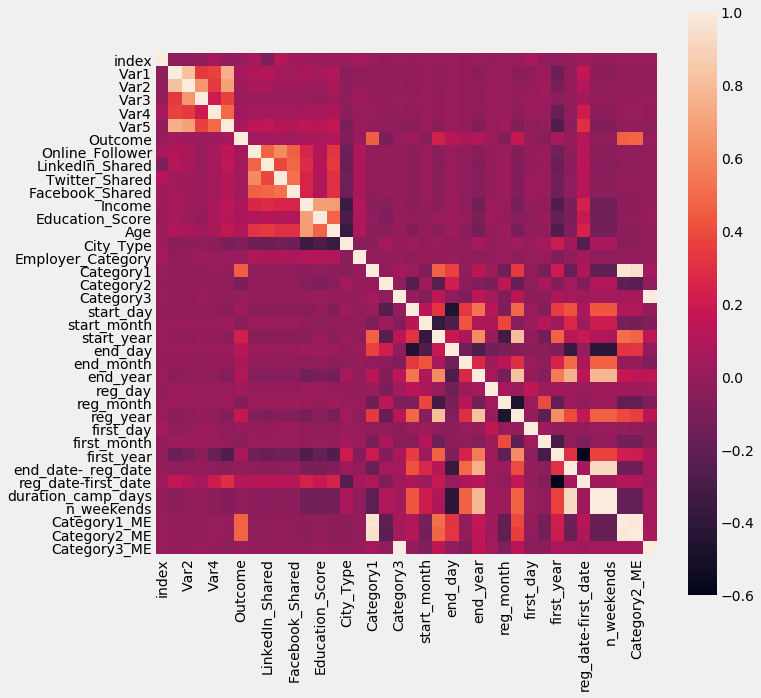

In [216]:
plt.figure(figsize = (10,10))


sns.heatmap(df[:len(train)].corr(), square=True)

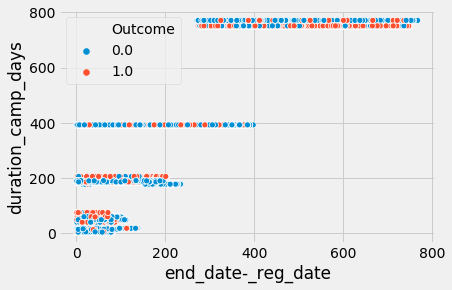

In [499]:
sns.scatterplot(df[:len(train)]['end_date-_reg_date'], df[:len(train)]['duration_camp_days'], hue=df[:len(train)]['Outcome'])

In [500]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,110193.0,55096.000000,31810.123444,0.000000,27548.000000,55096.000000,82644.000000,110192.000000
Var1,110193.0,0.795005,7.811765,0.000000,0.000000,0.000000,0.000000,344.000000
Var2,110193.0,0.240841,3.825393,0.000000,0.000000,0.000000,0.000000,181.000000
Var3,110193.0,0.000436,0.020867,0.000000,0.000000,0.000000,0.000000,1.000000
Var4,110193.0,0.028441,0.223511,0.000000,0.000000,0.000000,0.000000,8.000000
Var5,110193.0,0.249426,1.240426,0.000000,0.000000,0.000000,0.000000,34.000000
Outcome,74944.0,0.271376,0.444673,0.000000,0.000000,0.000000,1.000000,1.000000
Online_Follower,110193.0,0.054513,0.227029,0.000000,0.000000,0.000000,0.000000,1.000000
LinkedIn_Shared,110193.0,0.063371,0.243629,0.000000,0.000000,0.000000,0.000000,1.000000
Twitter_Shared,110193.0,0.051319,0.220649,0.000000,0.000000,0.000000,0.000000,1.000000


In [47]:
df = df.set_index('index')

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Var1,110193.0,0.795005,7.811765,0.000000,0.000000,0.000000,0.000000,344.000000
Var2,110193.0,0.240841,3.825393,0.000000,0.000000,0.000000,0.000000,181.000000
Var4,110193.0,0.028441,0.223511,0.000000,0.000000,0.000000,0.000000,8.000000
Var5,110193.0,0.249426,1.240426,0.000000,0.000000,0.000000,0.000000,34.000000
Outcome,74944.0,0.271376,0.444673,0.000000,0.000000,0.000000,1.000000,1.000000
Online_Follower,110193.0,0.054513,0.227029,0.000000,0.000000,0.000000,0.000000,1.000000
LinkedIn_Shared,110193.0,0.063371,0.243629,0.000000,0.000000,0.000000,0.000000,1.000000
Twitter_Shared,110193.0,0.051319,0.220649,0.000000,0.000000,0.000000,0.000000,1.000000
Facebook_Shared,110193.0,0.053914,0.225850,0.000000,0.000000,0.000000,0.000000,1.000000
Income,110193.0,-0.414582,1.207523,-1.000000,-1.000000,-1.000000,0.000000,6.000000


In [50]:
df.to_csv('processed_data.csv', index = False)

In [523]:
target = df.pop('Outcome')

In [524]:
target = target.dropna()

In [525]:
len(target)

74944

In [526]:
train_new = df[:len(train)]
test_new = df[len(train):]

In [527]:
len(train_new)

74944

In [528]:
len(test_new)

35249

In [529]:
len(test)

35249

In [546]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# model = XGBClassifier(n_estimators=100, max_depth = 6)
model = LGBMClassifier(n_estimators = 150, max_depth=-1,num_leaves=40)
# model = CatBoostClassifier(n_estimators=150, num_leaves=)
# model =  RandomForestClassifier(n_jobs=-1)

# model = BaggingClassifier(LGBMClassifier(n_estimators = 150, max_depth=-1,num_leaves=40), n_estimators=5, n_jobs=-1)

score = cross_val_score(model, train_new, target, cv = 5, scoring = 'roc_auc')

In [547]:
score.mean()

0.8665007392694599

In [550]:
model.fit(train_new, target)

StackingClassifier(cv=None,
                   estimators=[('lgb1',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=40, objective=None,
                                               random_state=None, reg_alpha=0.0,
                                               reg_lambda=0.0, silent=...
                                               importance_ty

In [533]:
model.feature_importances_

array([158,  33,   7,  78,  23,  28,  18,  17, 199, 243, 352, 317, 153,
        77,  91,  11, 164, 160,  43, 190,  93,  25, 440, 226,  38, 264,
       326,  82, 872, 753, 199,  17,  55,   0,  80,   0,  18], dtype=int32)

In [534]:
df.columns

Index(['Var1', 'Var2', 'Var4', 'Var5', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'City_Type', 'Employer_Category', 'Category1', 'Category2', 'Category3',
       'start_day', 'start_month', 'start_year', 'end_day', 'end_month',
       'end_year', 'reg_day', 'reg_month', 'reg_year', 'first_day',
       'first_month', 'first_year', 'end_date-_reg_date',
       'reg_date-first_date', 'duration_camp_days', 'new_patient',
       'reg_before_start', 'Category1_ME', 'Category2_ME', 'Category3_ME',
       'shared'],
      dtype='object')

In [344]:
# df.drop(['Var3', 'n_weekends', 'Category1_ME', 'Category3_ME'], axis = 1, inplace = True)

In [548]:
from sklearn.ensemble import StackingClassifier

lgb1 = LGBMClassifier(n_estimators=100, num_leaves=40)
lgb2 = LGBMClassifier(n_estimators=150, num_leaves=40)
lgb3 = LGBMClassifier(n_estimators=200, num_leaves=40)
lgb4 = LGBMClassifier(n_estimators=250, num_leaves=41)
lgb5 = LGBMClassifier(n_estimators=300, num_leaves=41)
lgb6 = LGBMClassifier(n_estimators=350, num_leaves=42)

estimators = [('lgb1', lgb1), ('lgb2', lgb2), ('lgb3', lgb3), ('lgb4', lgb4), ('lgb5', lgb5), ('lgb6', lgb6)]

model = StackingClassifier(estimators=estimators)

score = cross_val_score(model, train_new, target, cv = 5, scoring = 'roc_auc')

In [549]:
score.mean()

0.8702625367139148

In [551]:
preds = model.predict_proba(test_new)

In [552]:
preds = preds[:, 1:]

In [553]:
preds = preds.flatten()

In [108]:
sub = pd.read_csv('/run/media/devesh/Hard Disk/Projects/Healthcare Analytics/input/sample_submmission.csv')

In [554]:
sub.head()

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.623890
1,500633,6584,0.375347
2,506945,6582,0.270152
3,497447,6551,0.308126
4,496446,6533,0.057828


In [282]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [283]:
test_new.head()

,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,...,first_day,first_month,first_year,end_date-_reg_date,reg_date-first_date,duration_camp_days,n_weekends,Category1_ME,Category2_ME,Category3_ME
index,,,,,,,,,,,,,,,,,,,,,
74944,1,0,0,0,2,0,0,0,0,0,...,5,2,2003,89,1201,66,9,0.632460,0.632460,0.271462
74945,0,0,0,0,0,0,1,0,0,1,...,11,12,2004,68,538,5,0,0.512531,0.494033,0.271462
74946,0,0,0,0,0,0,0,0,0,-1,...,19,4,2006,454,113,580,82,0.124180,0.121804,0.271462
74947,0,0,0,0,0,0,0,0,0,0,...,25,8,2006,83,2,5,0,0.512531,0.563472,0.271462
74948,0,0,0,0,0,0,0,0,0,-1,...,19,9,2006,4,0,3,0,0.124180,0.103608,0.271462


In [555]:
sub['Outcome'] = preds

In [556]:
sub.head()

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.548592
1,500633,6584,0.358048
2,506945,6582,0.293542
3,497447,6551,0.321422
4,496446,6533,0.071432


In [557]:
sub.to_csv('stack_lgb.csv', index = False)

In [558]:
target.value_counts()

0.0    54606
1.0    20338
Name: Outcome, dtype: int64